In [2]:
import pandas as pd
import mth_2 as m

## Загрузка данных

In [3]:
fldr_1 = 'D:\\Dev\\project_mth_2\\filtered_data\\'
f_names = ['apparel-messages.csv', 'apparel-target_binary.csv', 'apparel-purchases.csv', 'full_campaign_daily_event.csv', 'full_campaign_daily_event_channel.csv']

def rcsv(f_name):
    data = pd.read_csv(fldr_1 + f_name,parse_dates=True)
    print('===='+f_name+'====')
    data.info()
    return data

In [4]:
a_msg = rcsv(f_names[0])
a_targ_b = rcsv(f_names[1])
a_pur = rcsv(f_names[2])
f_cde= rcsv(f_names[3])
f_cde_f = rcsv(f_names[4])

====apparel-messages.csv====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12739798 entries, 0 to 12739797
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   bulk_campaign_id  int64 
 1   client_id         int64 
 2   message_id        object
 3   event             object
 4   channel           object
 5   date              object
 6   created_at        object
dtypes: int64(2), object(5)
memory usage: 680.4+ MB
====apparel-target_binary.csv====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49849 entries, 0 to 49848
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  49849 non-null  int64
 1   target     49849 non-null  int64
dtypes: int64(2)
memory usage: 779.0 KB
====apparel-purchases.csv====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202208 entries, 0 to 202207
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------      

In [5]:
display(a_msg)
display(a_msg['channel'].value_counts())
display(a_msg['event'].value_counts())

,bulk_campaign_id,client_id,message_id,event,channel,date,created_at
0,4439,1515915625626736623,1515915625626736623-4439-6283415ac07ea,open,email,2022-05-19,2022-05-19 00:14:20
1,4439,1515915625490086521,1515915625490086521-4439-62834150016dd,open,email,2022-05-19,2022-05-19 00:39:34
2,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,open,email,2022-05-19,2022-05-19 00:51:49
3,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,click,email,2022-05-19,2022-05-19 00:52:20
4,4439,1515915625471518311,1515915625471518311-4439-628341570c133,open,email,2022-05-19,2022-05-19 00:56:52
...,...,...,...,...,...,...,...
12739793,14657,1515915625477497874,1515915625477497874-14657-65cdd371cc86c,open,email,2024-02-15,2024-02-15 23:51:40
12739794,14657,1515915625765994334,1515915625765994334-14657-65cdd36018eac,open,email,2024-02-15,2024-02-15 23:52:20
12739795,14641,1515915625545014677,1515915625545014677-14641-65cb2434b25a1,open,email,2024-02-15,2024-02-15 23:52:40
12739796,14624,1515915625477497874,1515915625477497874-14624-65c5e22fb401e,open,email,2024-02-15,2024-02-15 23:58:40


channel
mobile_push    7512156
email          5227642
Name: count, dtype: int64

event
send           9058196
open           3085820
click           496339
purchase         64679
hard_bounce      19903
soft_bounce      10583
unsubscribe       2841
hbq_spam           823
complain           528
subscribe           85
close                1
Name: count, dtype: int64

In [6]:
display(a_pur)
display(a_pur['quantity'].value_counts())
#display(a_msg['event'].value_counts())

,client_id,quantity,price,category_ids,date,message_id
0,1515915625468169594,1,1999.0,"['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
1,1515915625468169594,1,2499.0,"['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
2,1515915625471138230,1,6499.0,"['4', '28', '57', '431']",2022-05-16,1515915625471138230-4437-6282242f27843
3,1515915625471138230,1,4999.0,"['4', '28', '244', '432']",2022-05-16,1515915625471138230-4437-6282242f27843
4,1515915625471138230,1,4999.0,"['4', '28', '49', '413']",2022-05-16,1515915625471138230-4437-6282242f27843
...,...,...,...,...,...,...
202203,1515915626010261344,1,1499.0,"['2', '18', '212', '726']",2024-02-16,1515915626010261344-14648-65cdb6d56c4c8
202204,1515915626010439406,1,99.0,"['4', '27', '233', '462']",2024-02-16,1515915625776605028-14662-65cf3abfe4f0d
202205,1515915626010439406,1,99.0,"['4', '27', '233', '462']",2024-02-16,1515915625776605028-14662-65cf3abfe4f0d
202206,1515915626010443527,1,1999.0,"['2', '18', '274', '446']",2024-02-16,1515915625766077627-14668-65cf5246bd490


quantity
1     201323
2        751
3         94
4         12
6          5
10         4
15         3
20         3
5          3
25         2
9          2
30         2
13         1
18         1
8          1
7          1
Name: count, dtype: int64

In [7]:
a_targ_b

,client_id,target
0,1515915625468060902,0
1,1515915625468061003,1
2,1515915625468061099,0
3,1515915625468061100,0
4,1515915625468061170,0
...,...,...
49844,1515915626010261344,0
49845,1515915626010266132,0
49846,1515915626010439406,0
49847,1515915626010443527,0


## Предобработка

    Дубли
    Аномалии
    Пропуски
    Типы данных
    Подготовка данных

Уберем дубли

In [8]:
print('a_msg: ')
m.drop_dup(a_msg)
print('a_pur: ')
m.drop_dup(a_pur)
print('a_targ_b: ')
m.drop_dup(a_targ_b)
print('f_cde: ')
m.drop_dup(f_cde)
print('f_cde_f: ')
m.drop_dup(f_cde_f)

a_msg: 
Кол-во дублей ДО удаления:  48610
Кол-во ДО удаления:  12739798
Кол-во ПОСЛЕ удаления:  12691188

a_pur: 
Кол-во дублей ДО удаления:  73020
Кол-во ДО удаления:  202208
Кол-во ПОСЛЕ удаления:  129188

a_targ_b: 
Кол-во дублей ДО удаления:  0
Кол-во ДО удаления:  49849
Кол-во ПОСЛЕ удаления:  49849

f_cde: 
Кол-во дублей ДО удаления:  0
Кол-во ДО удаления:  131072
Кол-во ПОСЛЕ удаления:  131072

f_cde_f: 
Кол-во дублей ДО удаления:  0
Кол-во ДО удаления:  131072
Кол-во ПОСЛЕ удаления:  131072



Рассмотрим неявные дубли

In [9]:
a_targ_b['client_id'].duplicated().sum()
a_targ_b

,client_id,target
0,1515915625468060902,0
1,1515915625468061003,1
2,1515915625468061099,0
3,1515915625468061100,0
4,1515915625468061170,0
...,...,...
49844,1515915626010261344,0
49845,1515915626010266132,0
49846,1515915626010439406,0
49847,1515915626010443527,0


Рассмотрим аномалии:

In [10]:
display(a_pur)
display(a_pur['date'].max(), a_pur['date'].min())

,client_id,quantity,price,category_ids,date,message_id
0,1515915625468169594,1,1999.0,"['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
1,1515915625468169594,1,2499.0,"['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
2,1515915625471138230,1,6499.0,"['4', '28', '57', '431']",2022-05-16,1515915625471138230-4437-6282242f27843
3,1515915625471138230,1,4999.0,"['4', '28', '244', '432']",2022-05-16,1515915625471138230-4437-6282242f27843
4,1515915625471138230,1,4999.0,"['4', '28', '49', '413']",2022-05-16,1515915625471138230-4437-6282242f27843
...,...,...,...,...,...,...
202203,1515915626010261344,1,1499.0,"['2', '18', '212', '726']",2024-02-16,1515915626010261344-14648-65cdb6d56c4c8
202204,1515915626010439406,1,99.0,"['4', '27', '233', '462']",2024-02-16,1515915625776605028-14662-65cf3abfe4f0d
202205,1515915626010439406,1,99.0,"['4', '27', '233', '462']",2024-02-16,1515915625776605028-14662-65cf3abfe4f0d
202206,1515915626010443527,1,1999.0,"['2', '18', '274', '446']",2024-02-16,1515915625766077627-14668-65cf5246bd490


'2024-02-16'

'2022-05-16'

In [11]:
a_msg#.info()

,bulk_campaign_id,client_id,message_id,event,channel,date,created_at
0,4439,1515915625626736623,1515915625626736623-4439-6283415ac07ea,open,email,2022-05-19,2022-05-19 00:14:20
1,4439,1515915625490086521,1515915625490086521-4439-62834150016dd,open,email,2022-05-19,2022-05-19 00:39:34
2,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,open,email,2022-05-19,2022-05-19 00:51:49
3,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,click,email,2022-05-19,2022-05-19 00:52:20
4,4439,1515915625471518311,1515915625471518311-4439-628341570c133,open,email,2022-05-19,2022-05-19 00:56:52
...,...,...,...,...,...,...,...
12739793,14657,1515915625477497874,1515915625477497874-14657-65cdd371cc86c,open,email,2024-02-15,2024-02-15 23:51:40
12739794,14657,1515915625765994334,1515915625765994334-14657-65cdd36018eac,open,email,2024-02-15,2024-02-15 23:52:20
12739795,14641,1515915625545014677,1515915625545014677-14641-65cb2434b25a1,open,email,2024-02-15,2024-02-15 23:52:40
12739796,14624,1515915625477497874,1515915625477497874-14624-65c5e22fb401e,open,email,2024-02-15,2024-02-15 23:58:40


Подготовим таблицу маркетинговых активностей по каждому клиенту

In [12]:
a_msg['event'].value_counts()

event
send           9058196
open           3085820
click           496339
purchase         64679
hard_bounce      19903
soft_bounce      10583
unsubscribe       2841
hbq_spam           823
complain           528
subscribe           85
close                1
Name: count, dtype: int64

In [13]:
##Отберем не все типы активностей, а встречающиеся хотябы 10тыс раз
s = a_msg['event'].value_counts()
act_events = list(s[s>10000].index)
#list(filter(lambda x: x>10000, a_msg['event'].value_counts()))
print(act_events)

['send', 'open', 'click', 'purchase', 'hard_bounce', 'soft_bounce']


In [14]:
a_msg['date'] = a_msg['date'].astype('datetime64[ns]')

for channel in list(a_msg['channel'].value_counts().index):
    a_msg[channel] = (a_msg['channel']==channel).astype(int)

for event in act_events:
    a_msg[event] = (a_msg['event']==event).astype(int)

val_col = [
 'message_id',
 'mobile_push',
 'email',
 'date',
 'send',
 'open',
 'click',
 'purchase',
 'hard_bounce',
 'soft_bounce']

a_msg_p = a_msg.pivot_table(
    index='client_id',
    values = val_col, aggfunc={
        'message_id':'count', 
        'mobile_push':'sum',
        'email':'sum',
        'date':'max',
        'send':'sum',
        'open':'sum',
        'click':'sum',
        'purchase':'sum',
        'hard_bounce':'sum',
        'soft_bounce':'sum'})
a_msg_p = a_msg_p.rename(columns={'message_id':'message_count','date':'last_date'})
#a_msg_p = a_msg_p.reset_index(drop=False)
#a_msg_p = a_msg_p.set_index('client_id')    

In [15]:
a_msg_p ##Таблица маркетинговых активностей по каждому клиенту
#print(list(filter(lambda x: x==True, a_msg_p.index.duplicated()))) ##проверим что нет дублей по client_id


,click,last_date,email,hard_bounce,message_count,mobile_push,open,purchase,send,soft_bounce
client_id,,,,,,,,,,
1515915625468060902,10,2024-01-19,177,0,177,0,35,5,126,0
1515915625468061003,6,2024-02-13,166,0,166,0,5,1,154,0
1515915625468061099,8,2024-02-13,182,2,276,94,51,0,215,0
1515915625468061100,1,2024-02-15,0,1,434,434,163,1,267,1
1515915625468061170,16,2024-02-15,202,0,293,91,31,3,243,0
...,...,...,...,...,...,...,...,...,...,...
1515915626010183608,0,2024-02-15,0,0,4,4,2,0,2,0
1515915626010221592,3,2024-02-15,0,0,7,7,2,0,2,0
1515915626010234726,0,2024-02-15,0,0,1,1,0,0,1,0


Подготовим таблицу статистики по покупкам клиента

In [16]:
a_pur.info()
a_pur['date'] = a_pur['date'].astype('datetime64[ns]')
print(a_pur['date'].max())
print(a_pur['date'].min())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202208 entries, 0 to 202207
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   client_id     202208 non-null  int64  
 1   quantity      202208 non-null  int64  
 2   price         202208 non-null  float64
 3   category_ids  202208 non-null  object 
 4   date          202208 non-null  object 
 5   message_id    202208 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ MB
2024-02-16 00:00:00
2022-05-16 00:00:00


In [17]:
a_pur['date_year'] = a_pur['date'].dt.year
a_pur['date_qrt'] = a_pur['date'].dt.quarter
a_pur_pvt = a_pur.pivot_table(index=['client_id','date_year','date_qrt'], values = ['message_id','price','date'], aggfunc={'message_id':'count' ,'price':'sum','date':'max'})
a_pur_pvt = a_pur_pvt.reset_index()
a_pur_pvt = a_pur_pvt.rename(columns={'message_id':'purch_count', 'price':'sum_price', 'date':'last_purch_date'})

for n in ['2022','2023','2024']:
    a_pur_pvt[n+'_sum'] = a_pur_pvt[a_pur_pvt['date_year']==int(n)]['sum_price']
    a_pur_pvt[n+'_sum'] = a_pur_pvt[n+'_sum'].fillna(0)

    a_pur_pvt[n+'_cnt'] = a_pur_pvt[a_pur_pvt['date_year']==int(n)]['purch_count']
    a_pur_pvt[n+'_cnt'] = a_pur_pvt[n+'_cnt'].fillna(0)

a_pur_pvt = a_pur_pvt.pivot_table(index = 'client_id', 
                                  values = ['last_purch_date','purch_count','sum_price','2022_sum','2022_cnt','2023_sum','2023_cnt','2024_sum','2024_cnt'],
                                  aggfunc={'last_purch_date':'max','purch_count':'sum', 'sum_price':'sum',
                                           '2022_sum':'sum','2022_cnt':'sum','2023_sum':'sum','2023_cnt':'sum','2024_sum':'sum','2024_cnt':'sum'})
#давность последней покупки
#частота покупок
#общая сумма трат
#Динамика покупок

a_pur_pvt ## статистика по покупкам

,2022_cnt,2022_sum,2023_cnt,2023_sum,2024_cnt,2024_sum,last_purch_date,purch_count,sum_price
client_id,,,,,,,,,
1515915625468060902,7.0,6993.0,0.0,0.0,0.0,0.0,2022-05-27,7,6993.0
1515915625468061003,0.0,0.0,7.0,16235.0,0.0,0.0,2023-01-04,7,16235.0
1515915625468061099,1.0,299.0,0.0,0.0,0.0,0.0,2022-05-17,1,299.0
1515915625468061100,0.0,0.0,0.0,0.0,2.0,2098.0,2024-02-10,2,2098.0
1515915625468061170,0.0,0.0,19.0,33601.0,0.0,0.0,2023-06-17,19,33601.0
...,...,...,...,...,...,...,...,...,...
1515915626010261344,0.0,0.0,0.0,0.0,6.0,8994.0,2024-02-16,6,8994.0
1515915626010266132,0.0,0.0,0.0,0.0,2.0,1818.0,2024-02-14,2,1818.0
1515915626010439406,0.0,0.0,0.0,0.0,2.0,198.0,2024-02-16,2,198.0


Добавим наиболее частую категорию

In [ ]:
a_pur_cat = a_pur[['client_id','category_ids']].copy()
a_pur_cat['category_ids']

df_exploded = a_pur_cat['category_ids'].explode('category_ids')


df_tags = pd.DataFrame(df_exploded['category_ids'], columns=['tag1', 'tag2', 'tag3', 'tag4'])
df_exploded = pd.concat([df_exploded, df_tags], axis=1)
print("\nWith separate columns:")
print(df_exploded)

print(df_exploded.info())


With separate columns:
                  client_id               category_ids tag1 tag2 tag3 tag4
0       1515915625468169594   ['4', '28', '57', '431']  NaN  NaN  NaN  NaN
1       1515915625468169594   ['4', '28', '57', '431']  NaN  NaN  NaN  NaN
2       1515915625471138230   ['4', '28', '57', '431']  NaN  NaN  NaN  NaN
3       1515915625471138230  ['4', '28', '244', '432']  NaN  NaN  NaN  NaN
4       1515915625471138230   ['4', '28', '49', '413']  NaN  NaN  NaN  NaN
...                     ...                        ...  ...  ...  ...  ...
202203  1515915626010261344  ['2', '18', '212', '726']  NaN  NaN  NaN  NaN
202204  1515915626010439406  ['4', '27', '233', '462']  NaN  NaN  NaN  NaN
202205  1515915626010439406  ['4', '27', '233', '462']  NaN  NaN  NaN  NaN
202206  1515915626010443527  ['2', '18', '274', '446']  NaN  NaN  NaN  NaN
202207  1515915626010443624   ['4', '28', '62', '656']  NaN  NaN  NaN  NaN

[202208 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 2022

Составим таблицу для построения модели

In [18]:
#a_targ_b[a_targ_b['client_id'].duplicated()] ## проверка на дубли. уже была
a_targ_b = a_targ_b.set_index('client_id')
display(a_targ_b)

,target
client_id,
1515915625468060902,0
1515915625468061003,1
1515915625468061099,0
1515915625468061100,0
1515915625468061170,0
...,...
1515915626010261344,0
1515915626010266132,0
1515915626010439406,0


In [19]:
#a_pur_pvt ## статистика по покупкам
#a_msg_p ##Таблица маркетинговых активностей по каждому клиенту
#a_targ_b ## таблица с целевым признаком

## соединим таблицы
fin_data = a_targ_b.join(a_pur_pvt).join(a_msg_p) 

## заполним пропуски
fin_data['last_date'] = fin_data['last_date'].fillna(fin_data['last_date'].mean()) 
fin_data = fin_data.fillna(0)

fin_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49849 entries, 1515915625468060902 to 1515915626010443624
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   target           49849 non-null  int64         
 1   2022_cnt         49849 non-null  float64       
 2   2022_sum         49849 non-null  float64       
 3   2023_cnt         49849 non-null  float64       
 4   2023_sum         49849 non-null  float64       
 5   2024_cnt         49849 non-null  float64       
 6   2024_sum         49849 non-null  float64       
 7   last_purch_date  49849 non-null  datetime64[ns]
 8   purch_count      49849 non-null  int64         
 9   sum_price        49849 non-null  float64       
 10  click            49849 non-null  float64       
 11  last_date        49849 non-null  datetime64[ns]
 12  email            49849 non-null  float64       
 13  hard_bounce      49849 non-null  float64       
 14  message_cou

## Анализ данных

<Axes: >

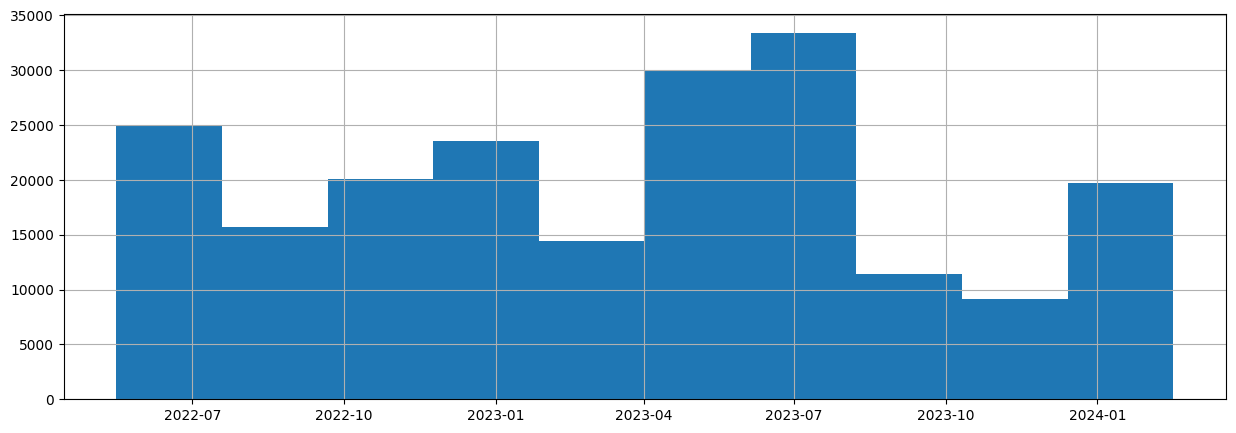

In [20]:
a_pur['date'].hist(figsize=(15,5))

In [21]:
fin_data.describe()

,target,2022_cnt,2022_sum,2023_cnt,2023_sum,2024_cnt,2024_sum,last_purch_date,purch_count,sum_price,click,last_date,email,hard_bounce,message_count,mobile_push,open,purchase,send,soft_bounce
count,49849.000000,49849.000000,49849.000000,49849.000000,49849.000000,49849.000000,49849.000000,49849,49849.000000,49849.000000,49849.000000,49849,49849.000000,49849.000000,49849.000000,49849.000000,49849.000000,49849.000000,49849.000000,49849.000000
mean,0.019278,1.637365,2131.301611,2.200245,2442.978555,0.218801,266.240466,2023-02-19 01:38:30.329193984,4.056410,4840.520632,9.139642,2024-01-07 10:59:00.831784960,96.919397,0.330518,219.681859,122.762463,50.339365,1.155249,158.458886,0.178860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-05-16 00:00:00,1.000000,1.000000,0.000000,2022-05-19 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-08-23 00:00:00,1.000000,1499.000000,1.000000,2024-01-07 10:59:00.831784960,0.000000,0.000000,81.000000,0.000000,0.000000,1.000000,59.000000,0.000000
50%,0.000000,1.000000,296.000000,0.000000,0.000000,0.000000,0.000000,2023-03-05 00:00:00,2.000000,2929.000000,5.000000,2024-02-14 00:00:00,84.000000,0.000000,200.000000,72.000000,15.000000,1.000000,151.000000,0.000000
75%,0.000000,2.000000,2499.000000,2.000000,2999.000000,0.000000,0.000000,2023-06-28 00:00:00,5.000000,5677.000000,12.000000,2024-02-15 00:00:00,173.000000,0.000000,322.000000,220.000000,77.000000,1.000000,243.000000,0.000000
max,1.000000,218.000000,158042.000000,210.000000,540408.000000,92.000000,387583.000000,2024-02-16 00:00:00,346.000000,540408.000000,384.000000,2024-02-15 00:00:00,878.000000,49.000000,3100.000000,2295.000000,1268.000000,103.000000,2473.000000,133.000000
std,0.137503,3.568347,4549.057183,4.412015,5776.044380,1.427124,2611.619778,NaN,5.521669,7312.865458,13.587737,NaN,94.941541,0.903909,175.003220,144.733594,72.126475,1.410531,118.018655,2.702151


## Обучение моделей

Зафиксируем основные параметры

## Оценка модели